In [3]:
from sklearn import datasets
import numpy as np

In [ ]:
iris =datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X= iris.data[:,[2,3]]
y=iris.target[:]

In [ ]:
#separar en conjuntos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) #estratificar la y, que tiene las etiquetas
#random state es el inicializador de numeros pseudo aleatorios, mismas etiquetas, es la semilla para la replicabilidad
#test_size, tamaño de pruebas va a ser el 30%

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [ ]:
print(f'Etiquetas en y: {np.bincount(y)}')
print(f'Etiquetas en y_train: {np.bincount(y_train)}')
print(f'Etiquetas en y_test: {np.bincount(y_test)}')
#Estratificacion sobre cada una de las etiquetas

Etiquetas en y:  [50 50 50]
Etiquetas en y_train:  [35 35 35]
Etiquetas en y_test:  [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler
#Nomralizacion, escala de 0 a 1 y repartirlos linealmente
#Estandarizacion, media 0 y variacion estandar 1
sc = StandardScaler()
sc.fit(X_train) #solo entrenamiento! aprende la media y desviacion estandar del conjunto de entrenamiento
X_train_std =sc.transform(X_train) #transformacion de entrenamiento y pruebas, no se aplica a los de prueba, Lo aplica a los datos de entrenamiento y pruebas
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
ppn= Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [ ]:
y_pred =ppn.predict(X_test_std) #Entrenamos estandarizada, probamos estandarizada
print(f'Errores de clasificacion: {(y_test-y_pred).sum()}')

Errores de clasificacion: 1


In [ ]:
#Coeficientes
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [ ]:
print(f'Exactitud: {ppn.score(X_test_std,y_test)}')

Exactitud: 0.9777777777777777


In [ ]:
from sklearn.metrics import accuracy_score #Exactitud
print(f'Exactitud: {accuracy_score(y_test,y_pred)}')

Exactitud: 0.9777777777777777


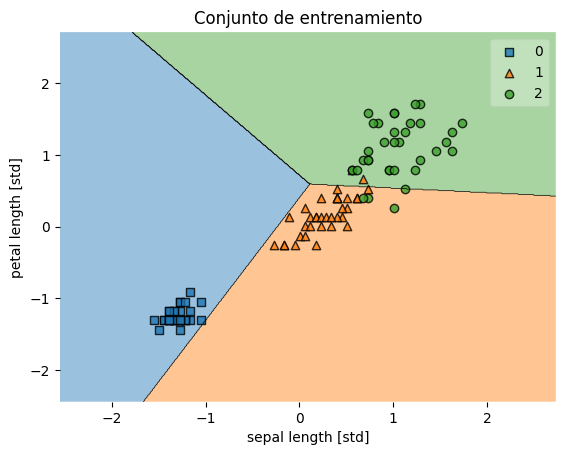

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train_std,y_train,clf=ppn)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Conjunto de entrenamiento')
plt.show()

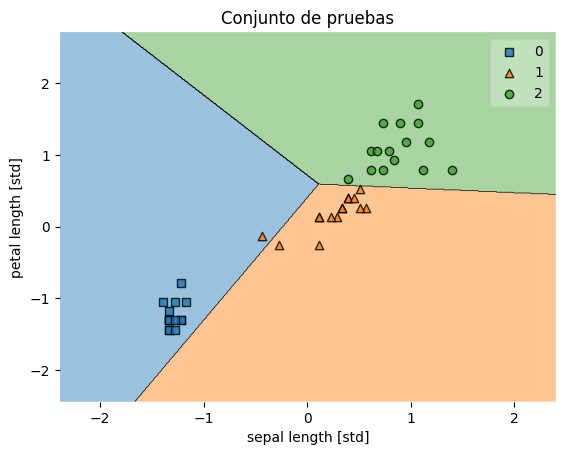

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_test_std,y_test,clf=ppn)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Conjunto de pruebas')
plt.show()
#Entrenamiento menor rendimiento que el de pruebas

In [ ]:
#Sigmoide
import numpy as np
import matplotlib.pyplot as plt
def sigmoide(z):
  return 1.0/(1+np.exp(-z))



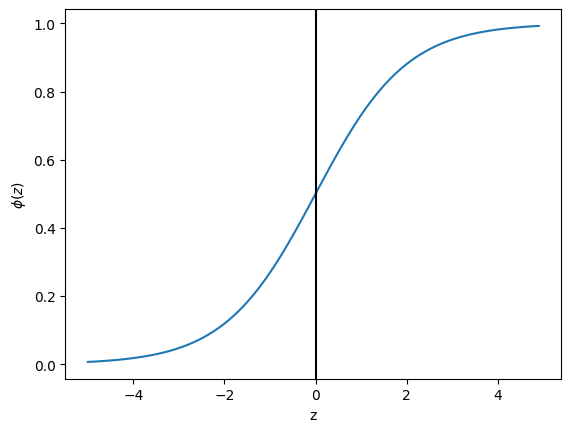

In [ ]:
z=np.arange(-5,5,0.1) #Pesos probabilidades implicitas.
#TAREA MORAL INCORPORAL LA SIGMOIDE AL PERCEPTRON MANUAL
phi_z=sigmoide(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='black')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(C=100.0,random_state=1)

In [ ]:
lr.fit(X_train_std,y_train)


LogisticRegression(C=100.0, random_state=1)

In [ ]:
y_hat = lr.predict(X_test_std)
print('Erroes: ',(y_test-y_hat).sum())
print('Exactitud ', lr.score(X_test_std,y_test))

Erroes:  1
Exactitud  0.9777777777777777


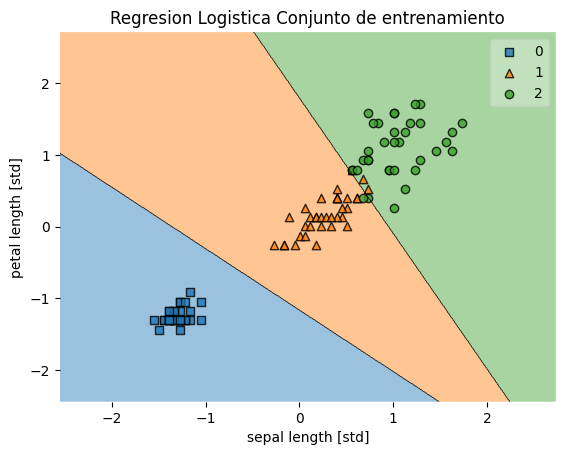

In [ ]:
plot_decision_regions(X_train_std,y_train,clf=lr)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresion Logistica Conjunto de entrenamiento')
plt.show()

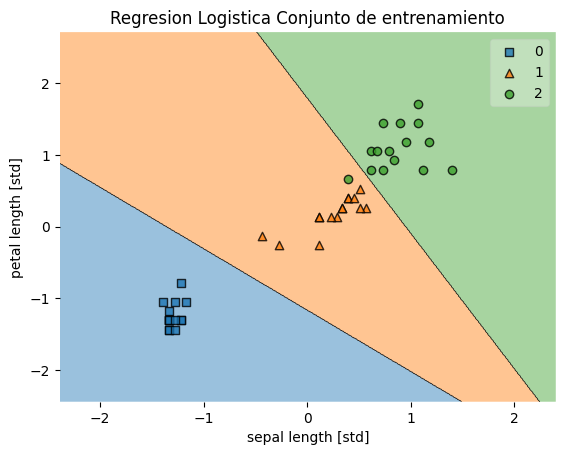

In [ ]:
plot_decision_regions(X_test_std,y_test,clf=lr)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresion Logistica Conjunto de pruebas')
plt.show()

In [ ]:
#Support Vector Machines
from  mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

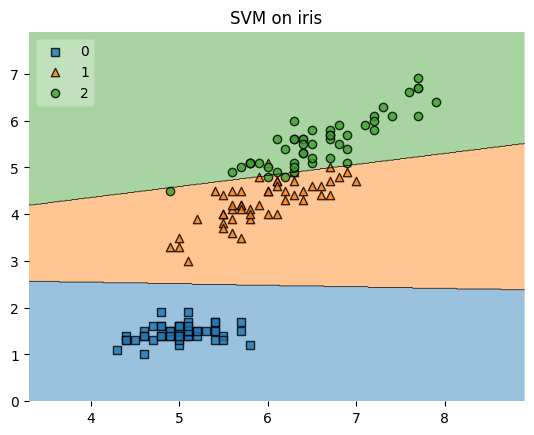

In [ ]:
iris = datasets.load_iris()
X=iris.data[:,[0,2]]
y=iris.target
svm =SVC(C=0.5,kernel = 'linear')
svm.fit(X,y)
#plot
plot_decision_regions(X,y,clf=svm,legend=2)
plt.title('SVM on iris')
plt.show()